# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Цель исследования:

1) Определить рыночную стоимость объектов недвижимости;

2) Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность;

3) Установить, какие факторы влияют на ценообразование стоимости квартир.

### Откроем файл с данными и изучим общую информацию. 

In [633]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

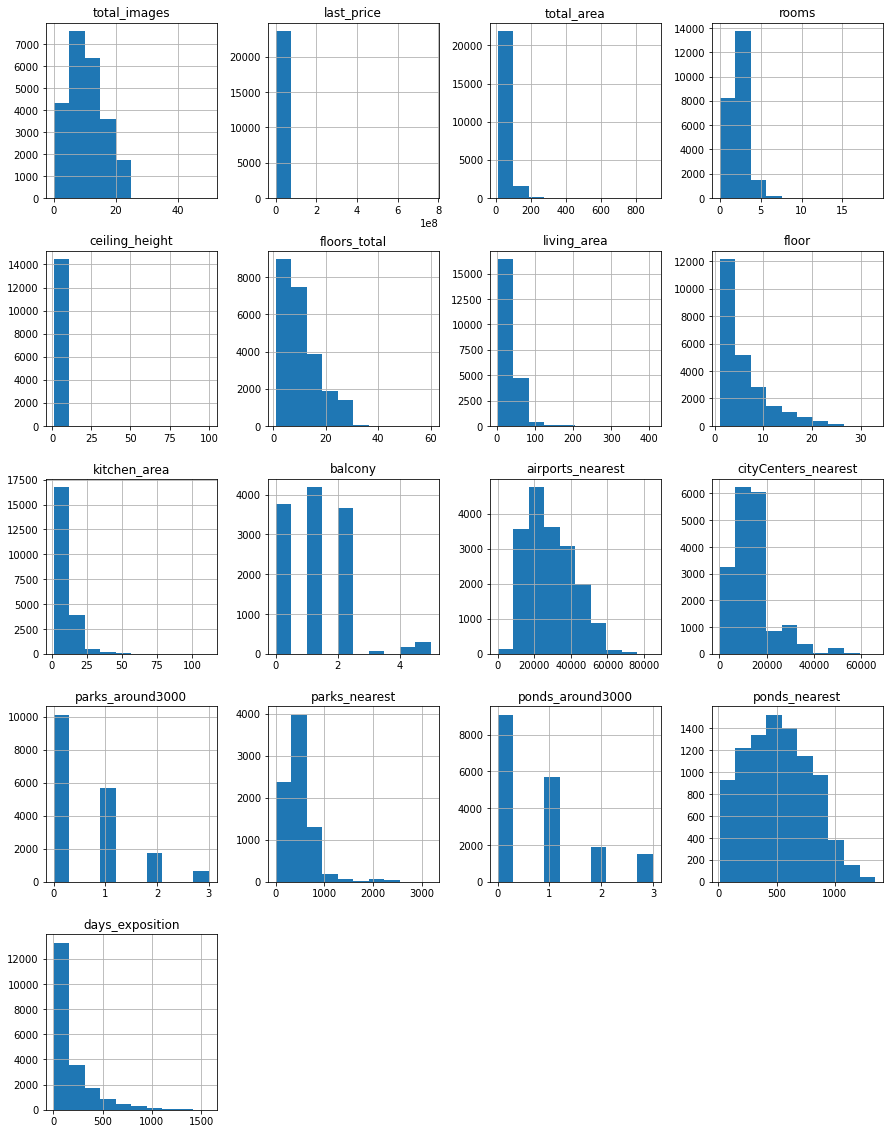

In [634]:
df.hist(figsize=(15, 20));

In [635]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [636]:
df['floor'] = round(df['floor']) 
df['floor'].unique()
# округляем значение этажа объекта до целого, так как оно не может быть дробным

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

### Предобработка данных

In [637]:
df.loc[df['ceiling_height']>5, 'ceiling_height'] = df['ceiling_height'].median()
df.loc[df['ceiling_height']<2.5, 'ceiling_height'] = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].unique()

#замена пропусков и ошибочных значений на более реальные 

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72, 2.54,
       2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 3.6 , 2.92,
       3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53, 2.74, 2.96,
       5.  , 2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 3.38,
       3.01, 3.65, 3.9 , 3.18, 3.35, 3.57, 2.62, 2.82, 3.98, 2.63, 3.83,
       3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24,
       4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46,
       3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45,
       3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65,
       3.56, 3.51, 3.93, 3.42, 2.99, 3.49, 4.14, 2.91, 3.88, 4.25, 3.29,
       3.76, 3.69, 2.89, 3.58, 4.9 , 3.48, 3.59])

In [638]:
duplicateRows = df[df.duplicated ()]
duplicateRows

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [639]:
df.loc[df['living_area']<15, 'living_area'] = df['total_area']*0.8
df.info()
#заменяем экстримальные значения на среднестатистические - жилая площадь-80% от общей

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [640]:
df.duplicated().sum()

0

In [641]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
df.info()
#замена пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [642]:
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
#если значение по количеству балконов отсутсвует предположительно эито из-за того что балконов нет -ставим 0

In [643]:
df['is_apartment'] = df['is_apartment'].astype(bool)
df['balcony'] = df['balcony'].astype(int)
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)
df.info()
#меняем аппартаменты на булевое значение так как столбец хранит в себе только True/False
#количество балконов парков и прудов заменим на целые, так как не могугт быть дробными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [644]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df.info()
# преобразуем дату, так как времяные показатели = 0 их можно отбросить

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [645]:
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок городского типа')
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df.head()
#поиск и замена дубликатов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,9.1,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [646]:
df.loc[df['rooms']==0,'rooms']=1
df['rooms'] = round(df['rooms'])
df['rooms'] = df['rooms'].astype(int)
df.info()
# заменим нулевые значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [647]:
df['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары',
       'поселок городского типа янино-1', 'поселок парголово',
       'поселок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посел

In [648]:
df['locality_name'].value_counts()

санкт-петербург            15721
поселок мурино               556
поселок шушары               440
всеволожск                   398
пушкин                       369
                           ...  
деревня курковицы              1
деревня рапполово              1
поселок цвылево                1
деревня большое рейзино        1
деревня шпаньково              1
Name: locality_name, Length: 323, dtype: int64

In [649]:
df.duplicated().sum()

0

### Посчитайте и добавьте в таблицу новые столбцы

In [650]:
df['price_area'] = round(df['last_price']/(df['total_area']),2)
#расчитываем стоимость за квадратный метр и добавляем новый столбец

In [651]:
df['day_public'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
# отдельно добавим день недели публикации

In [652]:
df['month_public'] = pd.DatetimeIndex(df['first_day_exposition']).month
# отдельно добавим месяц публикации

In [653]:
df['year_public'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['year_public'].unique()
# отдельно добавим год публикации

array([2019, 2018, 2015, 2017, 2016, 2014])

In [654]:
df['floors_total'] = round(df['floors_total'])
df['floors_total'].unique()
# количество этажей не может быть дробным, исправляем. Там где значение прорущено предположительно оно не было заполнено пользователем

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [655]:
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
df['type_floor'] = df.apply(type_floor, axis=1)
df.head()
# делаем срез для типа этажей

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day_public,month_public,year_public,type_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой


In [656]:
df['Center_km'] = round(df['cityCenters_nearest']/1000)
df.head()
# добавим новый стодбец, который показывает расстояние в км до центра от объекта

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day_public,month_public,year_public,type_floor,Center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

In [657]:
df['type_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

<AxesSubplot:xlabel='type_floor'>

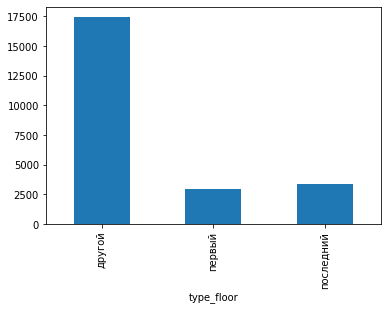

In [658]:
df.groupby(by='type_floor')['type_floor'].count().plot(kind='bar')

самое большое количество объектов находятся между первым и последним этажами

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

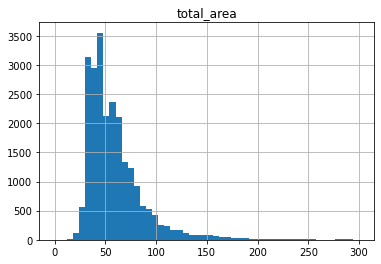

In [659]:
df.hist('total_area', bins=50, range=(0,300))

количество квартир с площадью больше 100 сильно стремится к 0

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

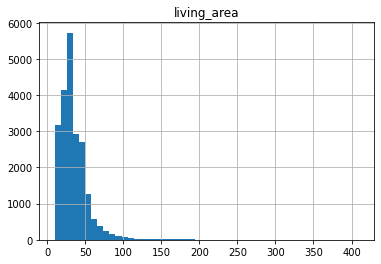

In [660]:
df.hist('living_area', bins=50)

больше всего объектов с жилой площадью менее 50кв.м

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

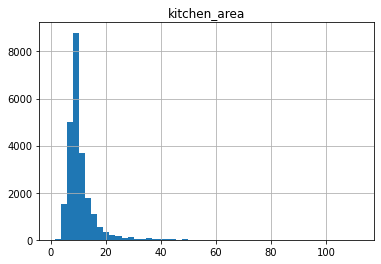

In [661]:
df.hist('kitchen_area', bins=50)

самое частое количество объектов с площадью кухни 10кв.м 

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

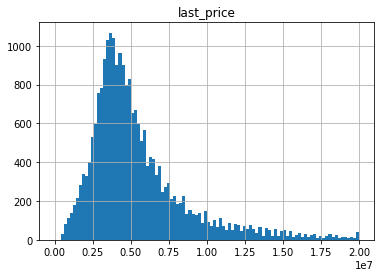

In [662]:
df.hist('last_price', bins=100, range=(0,2e+07))

самое большое количество объектов с ценой на момент снятия с продажи от 3 млн до 5 

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

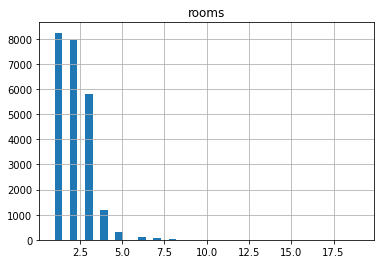

In [663]:
df.hist('rooms', bins=40)

больше всего объектов на продаже с количеством комнат - 1, 2, 3

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

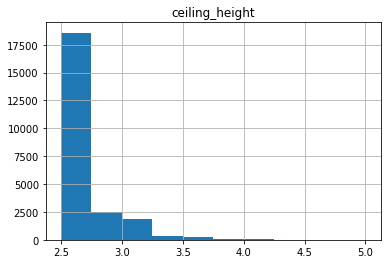

In [664]:
df.hist('ceiling_height', bins=10)

чаще всего встречаются объекты с высотой потолка 2,5м 

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

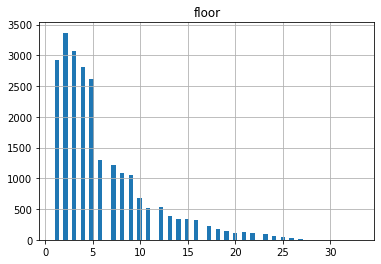

In [665]:
df.hist('floor', bins=70)

больше всего объектов расположено на 2 и 3 этажах

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

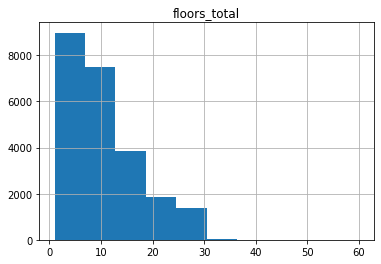

In [666]:
df.hist('floors_total', bins=10)

чаще всего на продажу выставлены объекты в домах до 8 этажей

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

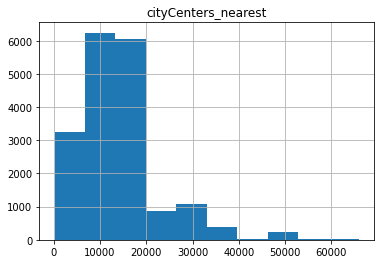

In [667]:
df.hist('cityCenters_nearest', bins=10)

больше всего на продажу выставлены объекты с удаленностью от центра на расстоянии от 8 до 20 км

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

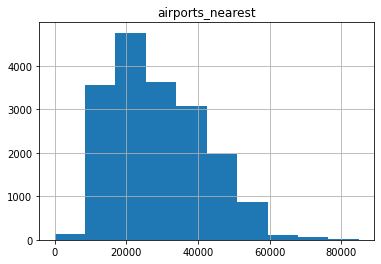

In [668]:
df.hist('airports_nearest', bins=10)

объекты с расстоянием от 17 до 22 км до аэропорта встречаются чаще всего

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

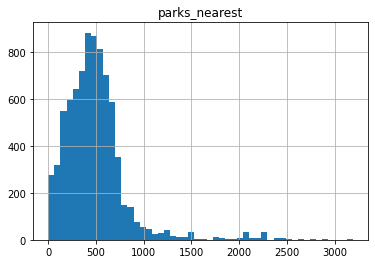

In [669]:
df.hist('parks_nearest', bins=50)

чаще всего встречаются объекты, расположенные на расстоянии от 400 до 500 метров до парков

array([[<AxesSubplot:title={'center':'day_public'}>]], dtype=object)

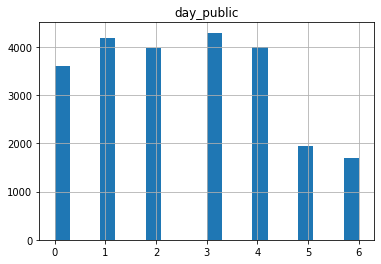

In [670]:
df.hist('day_public', bins=20)

исходя из графика можно сделать вывод, что наибольшее количество объявлений приходится на будни, в выходные замечается спад

array([[<AxesSubplot:title={'center':'month_public'}>]], dtype=object)

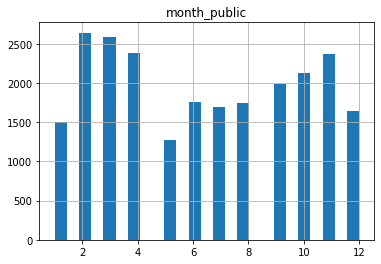

In [671]:
df.hist('month_public', bins=25)

согласно графику наибольшее количество объявлений о продаже приходится на месяца с февраля по апрель, в мае заметен явный спад, что скорее всего связано с большим количеством праздничных дней

<AxesSubplot:>

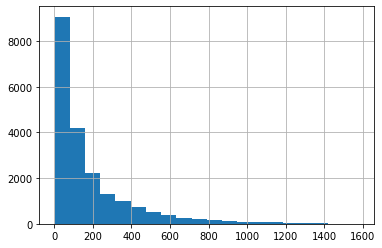

In [672]:
df['days_exposition'].hist(bins=20)

наибольшее количество объявления до снятия с публикации размещено до 100 дней, далее идет резкий спад

<AxesSubplot:>

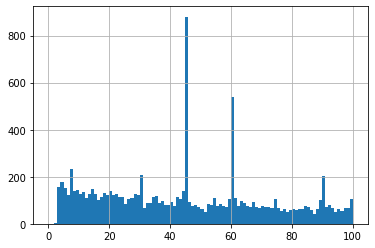

In [673]:
df['days_exposition'].hist(bins=100, range=(0,100))

In [674]:
day_exp_mean = df['days_exposition'].mean()
print('Среднее:', day_exp_mean)
day_exp_median = df['days_exposition'].median()
print('Медиана:', day_exp_median)
day_exp_min = df['days_exposition'].min()
print('Min:', day_exp_min)
day_exp_max = df['days_exposition'].max()
print('Max:', day_exp_max)

Среднее: 180.88863436982163
Медиана: 95.0
Min: 1.0
Max: 1580.0


Среднее количетсво дней, которые объекты висят на продаже составляет 180 дней однако медиана отличается почти в 2 раза, это связано с объявлениями, которые снимаются на следующий день, а некоторые объявления висят годами 

In [675]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

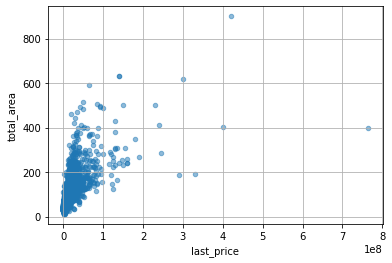

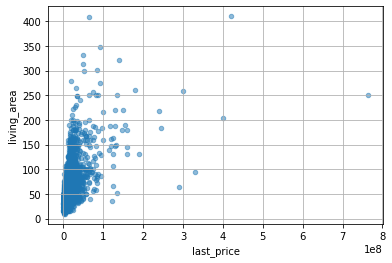

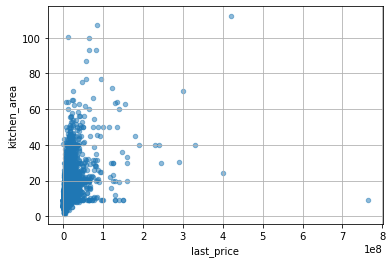

In [676]:
df.plot(x='last_price', y='total_area', kind='scatter', alpha=0.5, grid=True)
df.plot(x='last_price', y='living_area', kind='scatter', alpha=0.5, grid=True)
df.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.5, grid=True)

согласно графикам и коэффициентам Пирсона(указаны ниже) можно заметить, что наибольшая связь между стоимость объекта и площадными характеристиками - общей, жилой и кухни прослеживается у общей площади квартиры, однако стоит учитывать, что может влиять и расстояние до центра. Также можно заметить что в целом от площади объекта растет и цена, однако не везде - это может быть свзяно с неудачным(непривлекательным) расположением объекта или объект может находится в ненадлежащем состоянии 

In [677]:
df['total_area'].corr(df['last_price'])

0.6536750579657242

In [678]:
df['living_area'].corr(df['last_price'])

0.5699733549305621

In [679]:
df['kitchen_area'].corr(df['last_price'])

0.44031561243446554

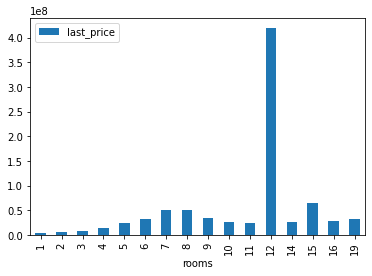

In [680]:
df.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar');


Предположительно, что данный выброс вызван либо элитным жильем в Питере или это частный дом, расположенный в элитном полселке, так как согласно датафрейму, захвачена большая часть Ленинградской области

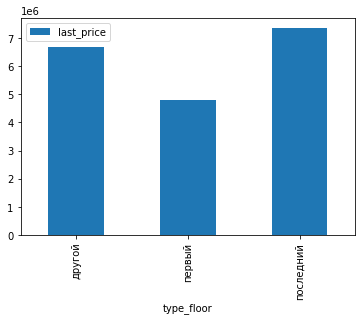

In [681]:
df.pivot_table(index='type_floor',values='last_price').plot(y='last_price', kind='bar');

дороже всего объекты расположенные на последних этажах, предположительно это связано с тем, что людям предпочтителен хороший вид из окон

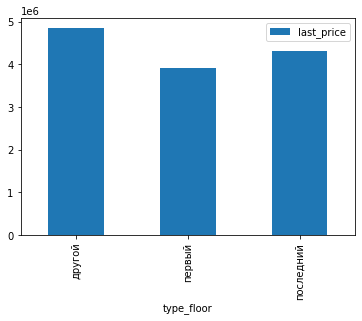

In [682]:
df.pivot_table(index='type_floor',values='last_price', aggfunc='median').plot(y='last_price', kind='bar');

<AxesSubplot:xlabel='day_public'>

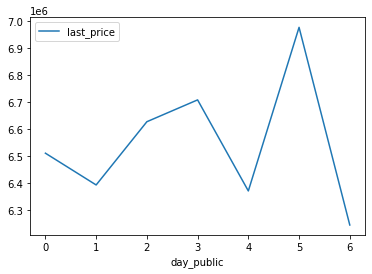

In [683]:
df.pivot_table(index='day_public',values='last_price').plot(y='last_price', kind='line')


По дням недели можно сказать, что самые дорогостоящие объекты выкладываются по субботам

<AxesSubplot:xlabel='month_public'>

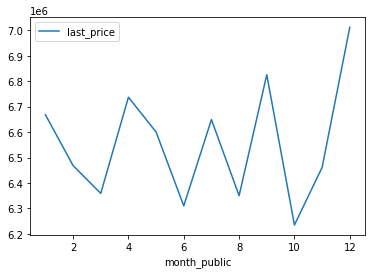

In [684]:
df.pivot_table(index='month_public',values='last_price').plot(y='last_price', kind='line')


По месяцам можно сказать, что самые дорогостоящие объекты выкладываются чаще всего в декабре

<AxesSubplot:xlabel='year_public'>

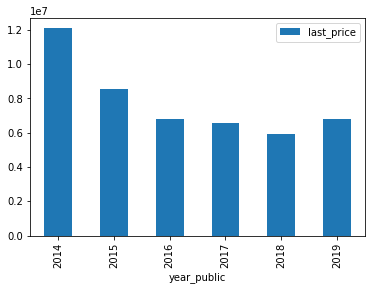

In [685]:
df['year_public'].unique()
df.pivot_table(index='year_public',values='last_price').plot(y='last_price', kind='bar')

По годам можно сказать, что самые дорогостоящие объекты выкладывались в 2014 году, далее можно увидеть что стоимость объектов начала опускаться

<AxesSubplot:xlabel='year_public'>

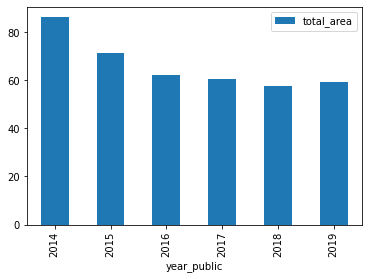

In [686]:
df.pivot_table(index='year_public',values='total_area').plot(y='total_area', kind='bar')

 с 2014 года площадь объектов ситала снижаться, также как и стоимость
    

<AxesSubplot:xlabel='locality_name'>

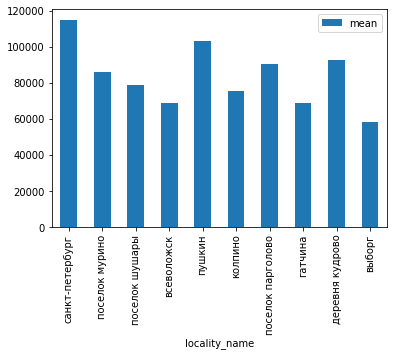

In [687]:
df.pivot_table(index='locality_name', values='price_area', aggfunc=['count', 'mean']).droplevel(level=1,axis=1)\
.sort_values(by='count', ascending=False).head(10).plot(y='mean', kind='bar')


In [688]:
df.pivot_table(index='locality_name', values='price_area', aggfunc=['count', 'mean']).droplevel(level=1,axis=1)\
.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
санкт-петербург,15721,114849.008793
поселок мурино,556,85681.762572
поселок шушары,440,78677.364318
всеволожск,398,68654.473970
пушкин,369,103125.819377
колпино,338,75424.579112
поселок парголово,327,90175.913089
гатчина,307,68746.146515
деревня кудрово,299,92473.547559


Исходя из топ 10, самая высокая средняя цена за квадратный метр в Санкт-Петербурге - 114781.9, а минимальная в Выборге - 58238.1 

In [689]:
df.pivot_table(index='locality_name', values='price_area', aggfunc=['count', 'median']).droplevel(level=1,axis=1)\
.sort_values(by='count', ascending=False).head(10)

,count,median
locality_name,,
санкт-петербург,15721,104761.900
поселок мурино,556,85878.465
поселок шушары,440,76876.175
всеволожск,398,65789.470
пушкин,369,100000.000
колпино,338,74723.745
поселок парголово,327,91642.860
гатчина,307,67796.610
деревня кудрово,299,91860.470


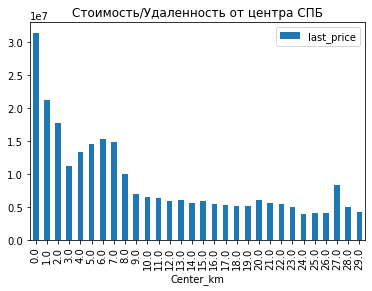

In [690]:
(
    df[df['locality_name']=='санкт-петербург']
    .pivot_table(index='Center_km', 
                 values='last_price', 
                 aggfunc='mean')
    .plot(kind='bar', title = 'Стоимость/Удаленность от центра СПБ')
);


чем ближе к центу Питера расположен объект, тем выше его средняя стоимость

### Общий вывод

В ходе анализа данных было произведена предобработка данных - замена ошибочных значение и нелогичных значений, изменены типы и выделены срезы данных для получения более точной информации, удалены дубликаты. Постоены и проанализированы гистограммы объектов  по параметрам: общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления. Получена и изучена корреляция(зависимоть) итоговой цены к общей площади, жилой площади и площади кухни. Получена информация в какие дни, месяцы и годы выкладываются самые дорогие объекты. Получены значения топ 10 населенных пунктов, в которых средняя стоимость объектов самая большая, а также изучена взаимосвязь удаленности от центра города и их средняя стоимость.
Учитывая изложенное можно сказать, что самая высокая средняя цена за квадратный метр в Санкт-Петербурге, стоимость зависит от близости к центру города и общей площади. Чем ближе объект, выставленный на продажу к центру города, тем он дороже, также на стоимоть влияет площадные характеристики(чем больше площадь, тем соответственно дороже объект) и этаж(на первых этажах стоимость меньше, чем на остальных). Наибольшее количество объявлений выставляется в будни - с середины зимы до начала весны. Самые популярные объявления предлагают 2-х комнатные квартиры площадью около 50 кв.м. Большинство объектов находится вблизи парков. В 2014 году самые высокие показатели за последние 5 лет по стоимости объектов. Также существуют ошибки в данных, показывающие, что некоторые объекты выложены в 1970г, необходимо отправить запрос для уточнения информации.


### Рекомендации

Возможно стоит сделать некоторые поля для заполнения пользователями на сайте Яндекс Недвижимоть обязательными, тогда в дальнейшем анлиз будет более точным. Рекомендуемые поля для обязательного заполнения: floors_total, floor.
